In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error ,median_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
CarPrice = pd.read_csv("car_price_prediction.csv")
df=CarPrice.copy()
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [16]:
#df.drop(['ID'], axis=1,inplace=True)

In [18]:
df.shape

(19237, 17)

In [20]:
print("Unique values in Levy\n",CarPrice['Levy'].unique()[0:10])

Unique values in Levy
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053']


In [22]:
print(df.iloc[2]['Levy'])

-


In [24]:
# Replace non-numeric values with NaN
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')

df['Levy']

0        1399.0
1        1018.0
2           NaN
3         862.0
4         446.0
          ...  
19232       NaN
19233     831.0
19234     836.0
19235    1288.0
19236     753.0
Name: Levy, Length: 19237, dtype: float64

In [26]:
df.Cylinders.unique()
(df.Cylinders).dtype

dtype('float64')

In [28]:
df['Cylinders']=df['Cylinders'].astype('int')
df['Cylinders'].head(2)

0    6
1    6
Name: Cylinders, dtype: int32

In [30]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [32]:
df['Engine volume'] = df['Engine volume'].str.replace(" Turbo","")
df['Engine volume'] = df['Engine volume'].astype('float')

In [34]:
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce') #non-numeric will be replaced with NaN
df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64

In [36]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [38]:
df['Mileage'] = df['Mileage'].str.replace(" km","").str.replace(",","")
df['Mileage']=df['Mileage'].astype(int)
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int32

In [40]:
num_duplicates = df.duplicated().sum()
num_duplicates

3512

In [42]:
df.drop_duplicates(inplace=True)
print(f'Data after dropping duplicated values has {df.shape[0]} rows ') #rows-=313

Data after dropping duplicated values has 15725 rows 


In [44]:
df.isnull().sum()

Price                  0
Levy                5684
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [46]:
df["Levy"].describe().T

count    10041.000000
mean       879.440195
std        458.772939
min         87.000000
25%        640.000000
50%        779.000000
75%       1018.000000
max      11714.000000
Name: Levy, dtype: float64

In [48]:
df["Levy"].fillna(df["Levy"].mean(),inplace=True)
df["Levy"]=df["Levy"].astype(int)

In [50]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [52]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,879,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4


In [54]:
#sayısal veriler
num_data=df[['Levy','Engine volume','Mileage','Cylinders','Airbags']]
num_data

,Levy,Engine volume,Mileage,Cylinders,Airbags
0,1399,3.5,186005,6,12
1,1018,3.0,192000,6,8
2,879,1.3,200000,4,2
3,862,2.5,168966,4,0
4,446,1.3,91901,4,4
...,...,...,...,...,...
19230,645,1.8,307325,4,12
19232,879,2.0,300000,4,5
19233,831,2.4,161600,4,8
19234,836,2.0,116365,4,4


In [56]:
outlier_cols = []

for column in num_data.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = num_data[column].quantile(0.25)
    Q3 = num_data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers based on the IQR
    outliers = (num_data[column] < Q1 - 1.5 * IQR) | (num_data[column] > Q3 + 1.5 * IQR)
    
    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

# Print columns with outliers
print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Levy', 'Engine volume', 'Mileage', 'Cylinders']


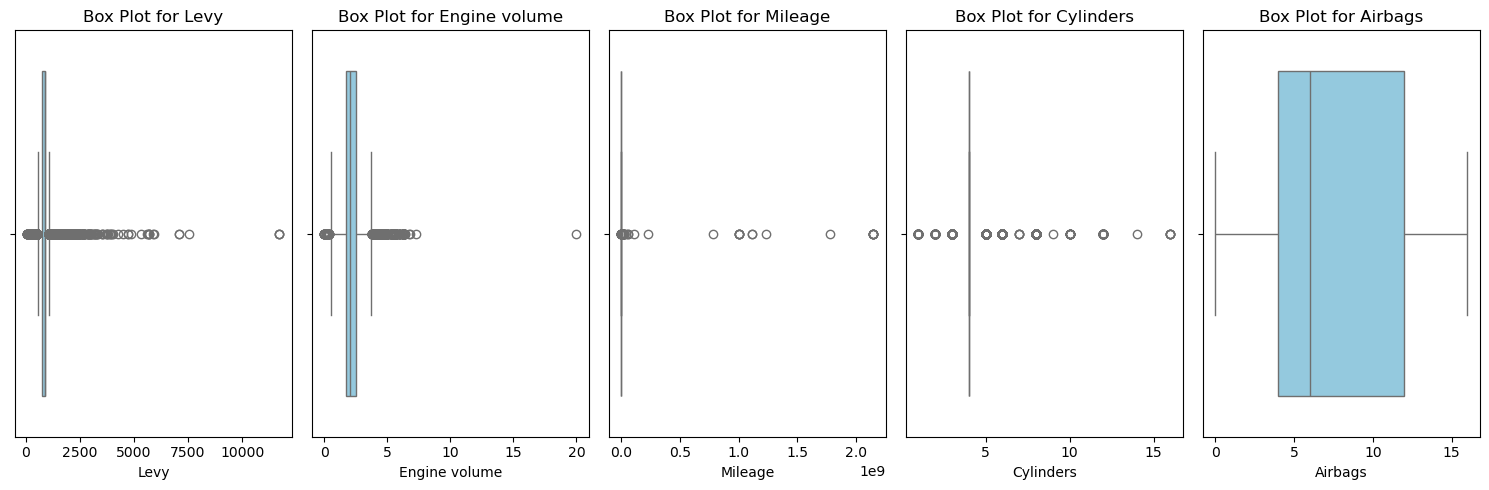

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=len(num_data.columns), figsize=(15, 5))

# Create box plots for each column
for i, column in enumerate(num_data.columns):
    sns.boxplot(x=num_data[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [60]:
data = {
    'Levy': [100, 150, 200, 250, 300, 5000],
    'Engine volume': [1.5, 2.0, 2.5, 3.0, 4.0, 10.0],
    'Mileage': [5000, 10000, 15000, 20000, 25000, 500000],
    'Cylinders': [4, 6, 8, 12, 16, 32]
}

df_select_out = pd.DataFrame(data)

# Function to replace outliers in a column with a specific value
def replace_outliers(column, replace_value):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value

for col in ['Levy', 'Engine volume', 'Mileage', 'Cylinders']:
    replace_outliers(df_select_out[col], replace_value=df_select_out[col].median())

In [62]:
average_prices = df.groupby('Prod. year')['Price'].mean().reset_index()
average_prices[:10]

,Prod. year,Price
0,1939,171.333333
1,1943,119172.000000
2,1947,150.000000
3,1953,17735.250000
4,1957,7527.000000
5,1964,6585.500000
6,1965,65074.000000
7,1968,2200.000000
8,1973,15681.000000
9,1974,2437.000000


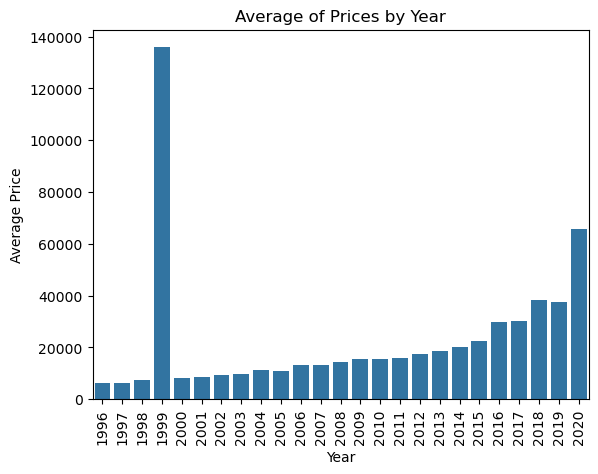

In [64]:
sns.barplot(x="Prod. year", y="Price", data= average_prices.tail(25))
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


In [66]:
# Find the year associated with the smallest and largest values in the 'Price' col
min_year = average_prices.loc[average_prices['Price'].idxmin(), 'Prod. year']
max_year = average_prices.loc[average_prices['Price'].idxmax(), 'Prod. year']

min_price = average_prices['Price'].min()
max_price = average_prices['Price'].max()

print(f"Smallest Price: {min_price} in              : {min_year}")
print(f"Largest Price: {max_price} in  : {max_year}")

Smallest Price: 150.0 in              : 1947
Largest Price: 135935.48780487804 in  : 1999


In [68]:
cat_count = df["Category"].value_counts().reset_index()
cat_count.columns = ['Category', 'Count']
cat_count

,Category,Count
0,Sedan,7010
1,Jeep,4225
2,Hatchback,2548
3,Minivan,534
4,Coupe,476
5,Universal,311
6,Microbus,295
7,Goods wagon,229
8,Pickup,51
9,Cabriolet,35


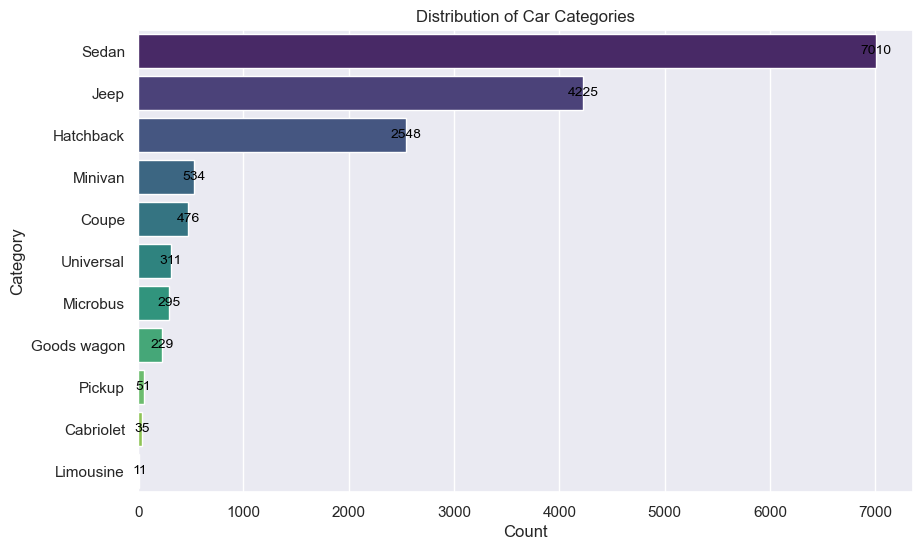

In [70]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='Category', data=cat_count, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Car Categories')

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=10, color='black')

plt.show()

In [72]:
df['Doors'].value_counts()

Doors
04-May    14855
02-Mar      746
>5          124
Name: count, dtype: int64

In [74]:
# Mapping categorical values to numerical values
door_mapping = {'02-Mar': 2, '04-May': 4, '>5': 5}
df['Doors'] = df['Doors'].map({'02-Mar': 2, '04-May': 4, '>5': 5})

In [76]:
num_data=df[['Levy','Engine volume','Mileage','Cylinders','Airbags','Doors']]
num_data

,Levy,Engine volume,Mileage,Cylinders,Airbags,Doors
0,1399,3.5,186005,6,12,4
1,1018,3.0,192000,6,8,4
2,879,1.3,200000,4,2,4
3,862,2.5,168966,4,0,4
4,446,1.3,91901,4,4,4
...,...,...,...,...,...,...
19230,645,1.8,307325,4,12,4
19232,879,2.0,300000,4,5,2
19233,831,2.4,161600,4,8,4
19234,836,2.0,116365,4,4,4


In [78]:
num_data.corr()

,Levy,Engine volume,Mileage,Cylinders,Airbags,Doors
Levy,1.000000,0.432145,0.009854,0.336490,0.067937,-0.047144
Engine volume,0.432145,1.000000,-0.003983,0.731923,0.257682,-0.034895
Mileage,0.009854,-0.003983,1.000000,0.000580,-0.010529,-0.005512
Cylinders,0.336490,0.731923,0.000580,1.000000,0.232044,-0.050979
Airbags,0.067937,0.257682,-0.010529,0.232044,1.000000,0.063625
Doors,-0.047144,-0.034895,-0.005512,-0.050979,0.063625,1.000000


In [80]:
gearbox_count=df['Gear box type'].value_counts()
gearbox_count

Gear box type
Automatic    10088
Tiptronic     3064
Manual        1841
Variator       732
Name: count, dtype: int64

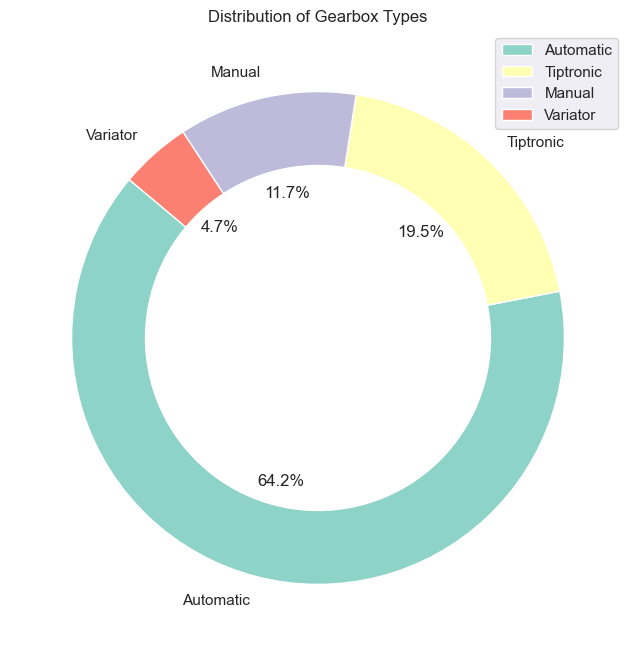

In [82]:
plt.figure(figsize=(8, 8))
plt.pie(gearbox_count, labels=gearbox_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

# Adding a circle at the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend()
plt.title('Distribution of Gearbox Types')
plt.show()


In [84]:
df['Wheel'].value_counts()

Wheel
Left wheel          14293
Right-hand drive     1432
Name: count, dtype: int64

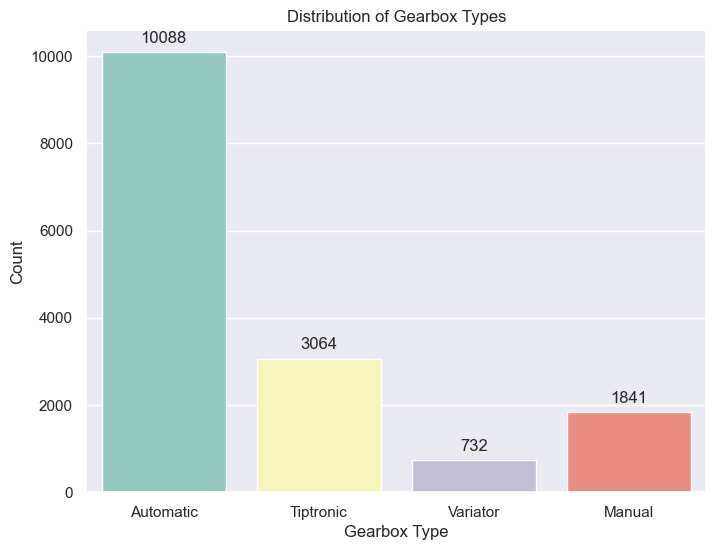

In [86]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gear box type', data=df, palette='Set3')

# Adding count labels above each bar as integers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Gearbox Type')
plt.ylabel('Count')
plt.title('Distribution of Gearbox Types')

plt.show()

In [88]:
leather_counts=df['Leather interior'].value_counts()
leather_counts

Leather interior
Yes    10558
No      5167
Name: count, dtype: int64

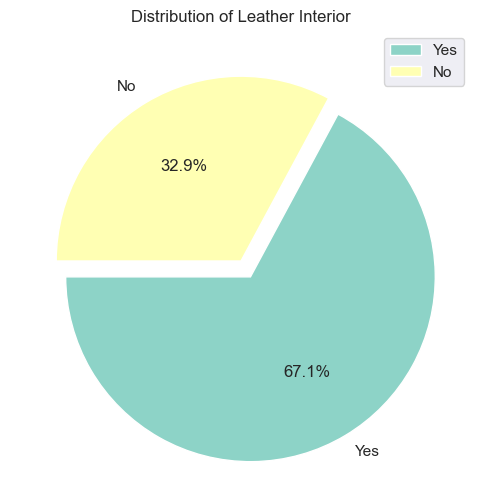

In [90]:
plt.figure(figsize=(6, 6))
explode = (0.1, 0) 
plt.pie(leather_counts, labels=leather_counts.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Set3.colors, explode=explode)

plt.legend()
plt.title('Distribution of Leather Interior')

plt.show()

In [92]:
df['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [94]:
df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

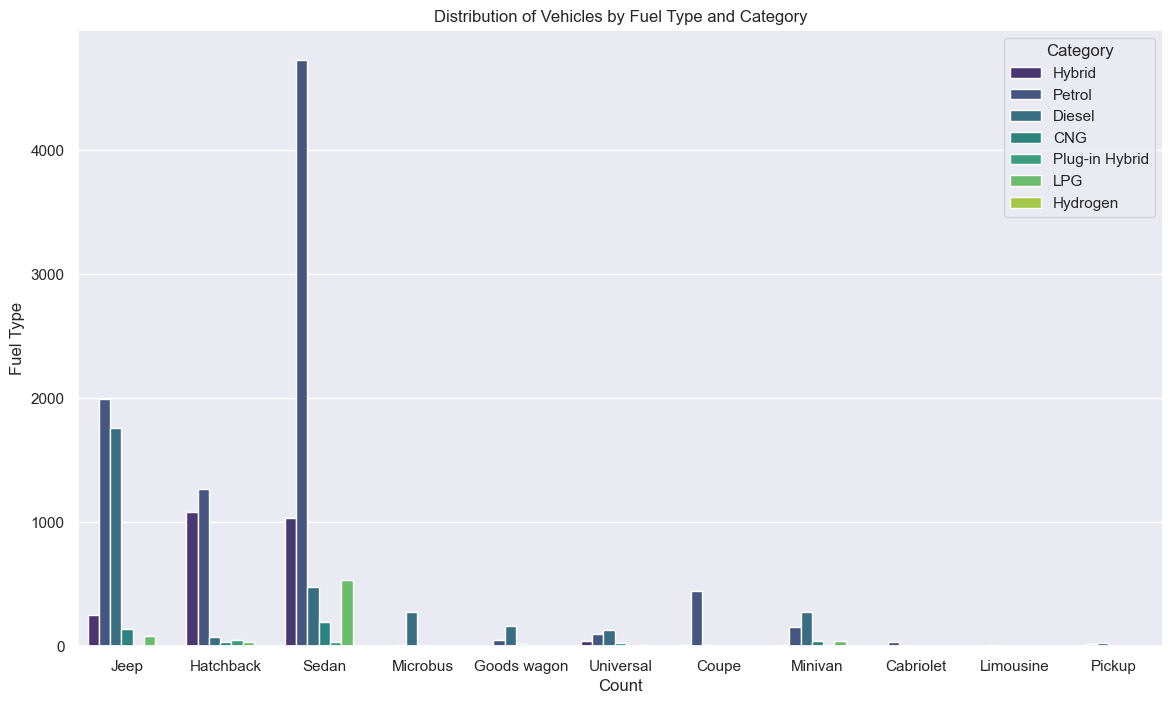

In [96]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Category', hue='Fuel type', data=df, palette='viridis')
plt.ylabel('Fuel Type')
plt.xlabel('Count')
plt.title('Distribution of Vehicles by Fuel Type and Category')
plt.legend(title='Category')

plt.show()

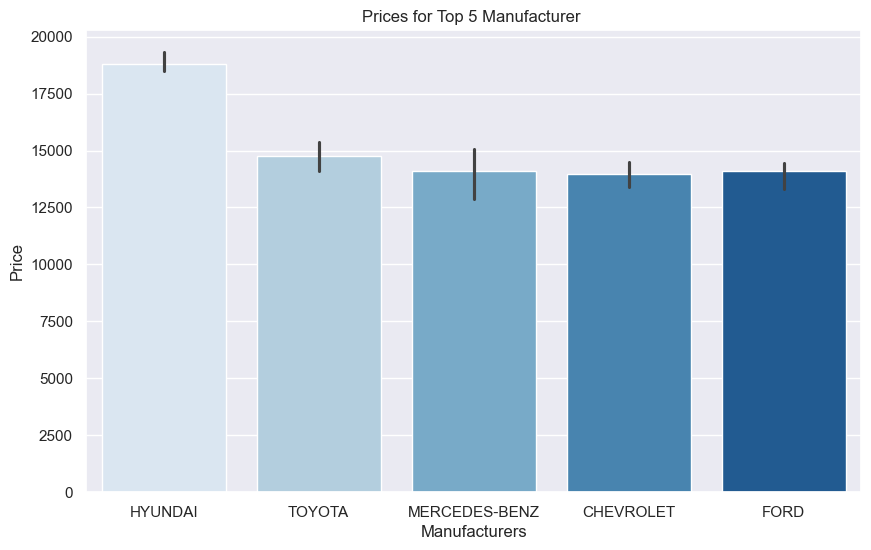

In [98]:
# Selecting 5 top manufacturers
top_manufacturers = df['Manufacturer'].value_counts().nlargest(5).index
# Create a bar plot with custom colors and sorted order
plt.figure(figsize=(10, 6))
sns.barplot(x='Manufacturer', y='Price', data=df[df['Manufacturer'].isin(top_manufacturers)],
            estimator='median', order=top_manufacturers, palette="Blues")
plt.title('Prices for Top 5 Manufacturer ') #median price
plt.xlabel('Manufacturers')
plt.ylabel('Price')
plt.show()

In [100]:
#Converting all categorical columns to Numerical


In [102]:
cat_columns=df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder=OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[cat_columns])
df[cat_columns] = encoded_data.astype(int)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,32,1242,2010,4,1,2,3.5,186005,6,0,0,4,0,12,12
1,16621,1018,8,658,2011,4,0,5,3.0,192000,6,2,0,4,0,1,8
2,8467,879,21,684,2006,3,0,5,1.3,200000,4,3,1,4,1,1,2
3,3607,862,16,661,2011,4,1,2,2.5,168966,4,0,0,4,0,14,0
4,11726,446,21,684,2014,3,1,5,1.3,91901,4,0,1,4,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645,58,1154,2011,3,1,2,1.8,307325,4,0,1,4,0,12,12
19232,8467,879,36,385,1999,1,1,0,2.0,300000,4,1,2,2,0,12,5
19233,15681,831,23,1334,2011,9,1,5,2.4,161600,4,2,1,4,0,11,8
19234,26108,836,23,1442,2010,4,1,1,2.0,116365,4,0,1,4,0,7,4


In [104]:
X=df.drop(['Price','Color','Gear box type','Doors','Wheel','Fuel type','Drive wheels','Manufacturer'],axis=1)
X

,Levy,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,Cylinders,Airbags
0,1399,1242,2010,4,1,3.5,186005,6,12
1,1018,658,2011,4,0,3.0,192000,6,8
2,879,684,2006,3,0,1.3,200000,4,2
3,862,661,2011,4,1,2.5,168966,4,0
4,446,684,2014,3,1,1.3,91901,4,4
...,...,...,...,...,...,...,...,...,...
19230,645,1154,2011,3,1,1.8,307325,4,12
19232,879,385,1999,1,1,2.0,300000,4,5
19233,831,1334,2011,9,1,2.4,161600,4,8
19234,836,1442,2010,4,1,2.0,116365,4,4


In [106]:
y = df['Price'].values.reshape(-1, 1)

scaler = StandardScaler()
y_standardized = scaler.fit_transform(y)

df['Price'] = y_standardized

In [108]:
df['Price']

0       -0.033003
1       -0.017369
2       -0.056081
3       -0.079154
4       -0.040608
           ...   
19230   -0.094047
19232   -0.056081
19233   -0.021832
19234    0.027672
19236   -0.094047
Name: Price, Length: 15725, dtype: float64

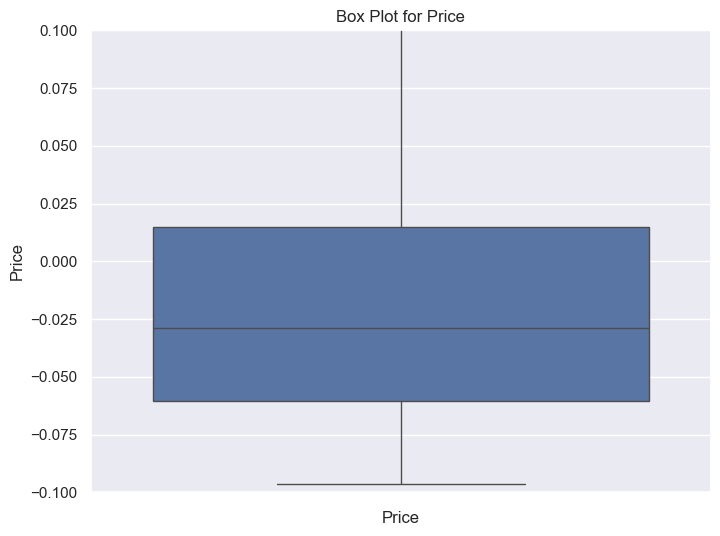

In [110]:
#Boxplot to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['Price'])
plt.title(f'Box Plot for Price')
plt.xlabel('Price')
plt.ylim(-.1,.1)
plt.show()

In [112]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median_price = df['Price'].median()
df['Price'] = df['Price'].apply(lambda x: median_price if x < lower_bound or x > upper_bound else x)

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y_standardized,test_size=.2,random_state=42)

In [116]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_square = r2_score(y_test,y_pred)
r2_square

0.04639185839859117

In [144]:
X=df.drop(columns=['Price'])
y=df['Price']

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [148]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [150]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.334819018273402


In [152]:
score2=r2_score(y_test, y_pred)
print(score2)

-323.515566860831
